In [399]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import os

In [400]:
# !tar -xvf languageID.tar

In [401]:
# Question 3 Part 1

# Calculate the prior probabilities for each language

num_e = 0
num_j = 0
num_s = 0
list_of_document_names = os.listdir("languageID")
list_of_training_document_names = [document_name for document_name in list_of_document_names if len(document_name) == 6]
for training_document_name in list_of_training_document_names:
    if training_document_name.startswith('e'):
        num_e += 1
    elif training_document_name.startswith('j'):
        num_j += 1
    elif training_document_name.startswith('s'):
        num_s += 1

total = num_e + num_j + num_s
prob_e = (num_e + 1 / 2) / (total + 3 / 2)
prob_j = (num_j + 1 / 2) / (total + 3 / 2)
prob_s = (num_s + 1 / 2) / (total + 3 / 2)
log_prob_e = math.log(prob_e)
log_prob_j = math.log(prob_j)
log_prob_s = math.log(prob_s)
print(f"Prior probabilities:\np(y=e) = {prob_e}\np(y=j) = {prob_j}\np(y=s) = {prob_s}")

Prior probabilities:
p(y=e) = 0.3333333333333333
p(y=j) = 0.3333333333333333
p(y=s) = 0.3333333333333333


In [402]:
def get_char_counts(document_name):
    char_counts = np.zeros(27, dtype = int)
    with open(os.path.join("languageID", document_name), 'r') as document:
        document_text = document.read()
        for character in document_text:
            if character.isalpha():
                character = character.lower()
                char_counts[ord(character) - ord('a')] += 1
            elif character.isspace():
                char_counts[26] += 1
    return char_counts

In [403]:
# Auxiliary method to get character counts for a language

def get_language_char_counts(list_of_training_document_names, language_initial):
    language_char_counts = np.zeros(27, dtype = int)
    for training_document_name in list_of_training_document_names:
        if training_document_name.startswith(language_initial):
            training_document_char_counts = get_char_counts(training_document_name)
            language_char_counts = np.add(language_char_counts, training_document_char_counts)
    return language_char_counts

In [404]:
# Question 3 Part 2

e_char_counts = get_language_char_counts(list_of_training_document_names, 'e')
j_char_counts = get_language_char_counts(list_of_training_document_names, 'j')
s_char_counts = get_language_char_counts(list_of_training_document_names, 's')

e_char_probs = (e_char_counts + 1 / 2) / (np.sum(e_char_counts) + e_char_counts.size * 1 / 2)
j_char_probs = (j_char_counts + 1 / 2) / (np.sum(j_char_counts) + j_char_counts.size * 1 / 2)
s_char_probs = (s_char_counts + 1 / 2) / (np.sum(s_char_counts) + s_char_counts.size * 1 / 2)

e_char_log_probs = np.log(e_char_counts + 1 / 2) - np.log(np.sum(e_char_counts) + e_char_counts.size * 1 / 2)
j_char_log_probs = np.log(j_char_counts + 1 / 2) - np.log(np.sum(j_char_counts) + j_char_counts.size * 1 / 2)
s_char_log_probs = np.log(s_char_counts + 1 / 2) - np.log(np.sum(s_char_counts) + s_char_counts.size * 1 / 2)

np.set_printoptions(suppress=True)
print(f"Class conditional probability for English:\n{e_char_probs}\n")

Class conditional probability for English:
[0.0593063  0.01097541 0.02120176 0.02165771 0.10385931 0.01866146
 0.01722846 0.04653965 0.05461651 0.00140042 0.00368018 0.02856212
 0.02022472 0.05709168 0.06354014 0.01651197 0.00055366 0.05305325
 0.06523368 0.07897737 0.02628236 0.0091516  0.01527439 0.00113988
 0.01364599 0.00061879 0.19101124]



In [405]:
# Question 3 Part 3

print(f"Class conditional probability for Japanese:\n{j_char_probs}\n")
print(f"Class conditional probability for Spanish:\n{s_char_probs}\n")

Class conditional probability for Japanese:
[0.12157065 0.01002611 0.00506141 0.01589348 0.0555466  0.00357845
 0.01292756 0.02930462 0.08952577 0.00215997 0.05296754 0.00132177
 0.03671943 0.05232277 0.08410974 0.00080596 0.00009671 0.03949192
 0.03891163 0.05258068 0.06515362 0.00022567 0.01821464 0.00003224
 0.01305651 0.00712467 0.19126987]

Class conditional probability for Spanish:
[0.10267357 0.00808429 0.03684864 0.03902867 0.11175705 0.00844763
 0.00705483 0.0044509  0.04895994 0.00650983 0.0002725  0.05198777
 0.0253429  0.0531989  0.07118418 0.02382899 0.00753929 0.05822509
 0.06458352 0.03497139 0.03309414 0.00578315 0.00009083 0.00245254
 0.00772096 0.00263421 0.18327429]



In [406]:
# Question 3 Part 4
x_char_counts = get_char_counts("e10.txt")
print(f"x = {x_char_counts}")

x = [164  32  53  57 311  55  51 140 140   3   6  85  64 139 182  53   3 141
 186 225  65  31  47   4  38   2 520]


In [407]:
# Question 3 Part 5

log_likelihood_x_given_y_is_e = np.sum(x_char_counts * e_char_log_probs)
log_likelihood_x_given_y_is_j = np.sum(x_char_counts * j_char_log_probs)
log_likelihood_x_given_y_is_s = np.sum(x_char_counts * s_char_log_probs)

print(f"p(x | y = e) = exp({log_likelihood_x_given_y_is_e})")
print(f"p(x | y = j) = exp({log_likelihood_x_given_y_is_j})")
print(f"p(x | y = s) = exp({log_likelihood_x_given_y_is_s})")

p(x | y = e) = exp(-7879.501611616057)
p(x | y = j) = exp(-8773.13628993369)
p(x | y = s) = exp(-8503.525472750553)


In [408]:
# Question 3 Part 6

total_char_counts = e_char_counts + j_char_counts + s_char_counts
total_char_log_probs = np.log(total_char_counts + (1 / 2)) - np.log(np.sum(total_char_counts) + total_char_counts.size * (1 / 2))
log_likelihood_x = np.sum(x_char_counts * total_char_log_probs)

log_prob_y_is_e_given_x = log_prob_e + log_likelihood_x_given_y_is_e - log_likelihood_x
log_prob_y_is_j_given_x = log_prob_j + log_likelihood_x_given_y_is_j - log_likelihood_x
log_prob_y_is_s_given_x = log_prob_s + log_likelihood_x_given_y_is_s - log_likelihood_x

print(f"p(y = e | x) = exp({log_prob_y_is_e_given_x})")
print(f"p(y = j | x) = exp({log_prob_y_is_j_given_x})")
print(f"p(y = s | x) = exp({log_prob_y_is_s_given_x})")

if log_prob_y_is_e_given_x > log_prob_y_is_j_given_x:
    if log_prob_y_is_e_given_x > log_prob_y_is_s_given_x:
        predicted_label_for_x = 'e'
    else:
        predicted_label_for_x = 's'
elif log_prob_y_is_j_given_x > log_prob_y_is_s_given_x:
    predicted_label_for_x = 'j'
else:
    predicted_label_for_x = 's'

print(f"\nPredicted label for x is: {predicted_label_for_x}")

p(y = e | x) = exp(153.40803165613306)
p(y = j | x) = exp(-740.2266466614992)
p(y = s | x) = exp(-470.6158294783627)

Predicted label for x is: e


In [409]:
# Question 3 Part 7

def predict_label_for_document(test_document_name):
    doc_char_counts = get_char_counts(test_document_name)
    log_likelihood_doc_given_y_is_e = np.sum(doc_char_counts * e_char_log_probs)
    log_likelihood_doc_given_y_is_j = np.sum(doc_char_counts * j_char_log_probs)
    log_likelihood_doc_given_y_is_s = np.sum(doc_char_counts * s_char_log_probs)
    log_prob_y_is_e_given_doc = log_prob_e + log_likelihood_doc_given_y_is_e
    log_prob_y_is_j_given_doc = log_prob_j + log_likelihood_doc_given_y_is_j
    log_prob_y_is_s_given_doc = log_prob_s + log_likelihood_doc_given_y_is_s
    if log_prob_y_is_e_given_doc > log_prob_y_is_j_given_doc:
        if log_prob_y_is_e_given_doc > log_prob_y_is_s_given_doc:
            predicted_label_for_doc = 'e'
        else:
            predicted_label_for_doc = 's'
    elif log_prob_y_is_j_given_doc > log_prob_y_is_s_given_doc:
        predicted_label_for_doc = 'j'
    else:
        predicted_label_for_doc = 's'
    return predicted_label_for_doc

pred_e_actual_e = 0
pred_e_actual_j = 0
pred_e_actual_s = 0
pred_j_actual_e = 0
pred_j_actual_j = 0
pred_j_actual_s = 0
pred_s_actual_e = 0
pred_s_actual_j = 0
pred_s_actual_s = 0

list_of_test_document_names = [document_name for document_name in list_of_document_names if len(document_name) == 7]

for test_document_name in list_of_test_document_names:
    predicted_label = predict_label_for_document(test_document_name)
    actual_label = test_document_name[0]
    if predicted_label == 'e' and actual_label == 'e':
        pred_e_actual_e += 1
    elif predicted_label == 'e' and actual_label == 'j':
        pred_e_actual_j += 1
    elif predicted_label == 'e' and actual_label == 's':
        pred_e_actual_s += 1
    elif predicted_label == 'j' and actual_label == 'e':
        pred_j_actual_e += 1
    elif predicted_label == 'j' and actual_label == 'j':
        pred_j_actual_j += 1
    elif predicted_label == 'j' and actual_label == 's':
        pred_j_actual_s += 1
    elif predicted_label == 's' and actual_label == 'e':
        pred_s_actual_e += 1
    elif predicted_label == 's' and actual_label == 'j':
        pred_s_actual_j += 1
    elif predicted_label == 's' and actual_label == 's':
        pred_s_actual_s += 1

row_predicted_e = np.array([pred_e_actual_e, pred_e_actual_j, pred_e_actual_s])
row_predicted_j = np.array([pred_j_actual_e, pred_j_actual_j, pred_j_actual_s])
row_predicted_s = np.array([pred_s_actual_e, pred_s_actual_j, pred_s_actual_s])
confusion_matrix = np.vstack((row_predicted_e, row_predicted_j, row_predicted_s))

print(f"Confusion matrix:\n{confusion_matrix}")

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [458]:
# Question 4 Part 2

# References:
# 1. https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
# 2. https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py

# Defining some helper functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_dash(x):
    sigmoid_dash = sigmoid(x) * (1 - sigmoid(x))
    return sigmoid_dash

def get_softmax(x):
    exp_x_vector = np.exp(x)
    normalized_exp_x_vector = exp_x_vector / sum(exp_x_vector)
    return normalized_exp_x_vector

In [459]:
def calculate_network_output(x, W1, W2):
    x = x.flatten()
    u = np.dot(W1, x)
    v = sigmoid(u)
    z = np.dot(W2, v)
    y_hat = get_softmax(z)
    return y_hat

In [460]:
def calculate_cross_entropy_loss(y, y_hat):
    y_one_hot_vector = np.zeros(10)
    y_one_hot_vector[y] = 1
    return -np.dot(y_one_hot_vector, np.log(y_hat))

In [461]:
def get_new_weights_backprop(learning_rate, y, y_hat, W1, W2, x):
    x = x.flatten()
    u = np.dot(W1, x)
    v = sigmoid(u)
    z = np.dot(W2, v)
    new_W2 = np.zeros(W2.shape)
    new_W1 = np.zeros(W1.shape)
    
    for i in range(v.shape[0]):
        new_W2[:, i] = W2[:, i] - (learning_rate * np.dot((y_hat - y), v[i]))
    for i in range(x.shape[0]):
        new_W1[:, i] = W1[:, i] - (learning_rate * np.dot(np.dot(np.dot(np.dot((y_hat - y), W2), (v)), (1 - v)), (x[i])))
    return W1, W2

In [462]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# References:
# 1. https://www.datascienceweekly.org/tutorials/pytorch-mnist-load-mnist-dataset-from-pytorch-torchvision
# 2. https://stackoverflow.com/questions/54897646/pytorch-datasets-converting-entire-dataset-to-numpy
# 3. https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset
# 4. https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_set = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_set = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

train_loader = DataLoader(train_set, batch_size = 1)
test_loader = DataLoader(test_set, batch_size = 1)

In [465]:
d = 784 # number of pixels
d1 = 8 # 8 nodes in hidden layer
k = 10 # 10 class labels
W1 = np.random.randn(d1, d) # Weight matrix W1
W2 = np.random.randn(k, d1) # Weight matrix W2

learning_rate = 0.1

for epoch in range(1):
    running_loss = 0.0
    count = 0
    for data in train_loader:
        if count % 1000 == 0:
            print(f"Reached count {count}")
        count += 1
        train_set_features, train_set_labels = data
        train_set_features = train_set_features.numpy().squeeze()
        train_set_labels = train_set_labels.numpy()
        # print(train_set_features.shape)
        # print(train_set_labels.shape)
        y_hat = calculate_network_output(train_set_features, W1, W2)
        running_loss += calculate_cross_entropy_loss(train_set_labels, y_hat)
        W1, W2 = get_new_weights_backprop(learning_rate, train_set_labels, y_hat, W1, W2, train_set_features)
    print(f"Loss = {running_loss / len(train_loader)}%")

Reached count 0
Reached count 1000
Reached count 2000
Reached count 3000
Reached count 4000
Reached count 5000
Reached count 6000
Reached count 7000
Reached count 8000
Reached count 9000
Reached count 10000
Reached count 11000
Reached count 12000
Reached count 13000
Reached count 14000
Reached count 15000
Reached count 16000
Reached count 17000
Reached count 18000
Reached count 19000
Reached count 20000
Reached count 21000
Reached count 22000
Reached count 23000
Reached count 24000
Reached count 25000
Reached count 26000
Reached count 27000
Reached count 28000
Reached count 29000
Reached count 30000
Reached count 31000
Reached count 32000
Reached count 33000
Reached count 34000
Reached count 35000
Reached count 36000
Reached count 37000
Reached count 38000
Reached count 39000
Reached count 40000
Reached count 41000
Reached count 42000
Reached count 43000
Reached count 44000
Reached count 45000
Reached count 46000
Reached count 47000
Reached count 48000
Reached count 49000
Reached count

In [470]:
running_loss = 0.0
with torch.no_grad():
    for data in test_loader:
        test_set_features, test_set_labels = data
        test_set_features = test_set_features.numpy()
        test_set_labels = test_set_labels.numpy()
        predicted_labels = calculate_network_output(train_set_features, W1, W2)
        running_loss += calculate_cross_entropy_loss(train_set_labels, y_hat)

print(f"Test error is {running_loss / len(test_loader)}%")

Test error is 2.4758644415054065%


In [446]:
# Question 4 Part 3

# 1. https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
# 2. https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
# 3. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer = nn.Linear(784, 32)
        self.sigmoid_activation = nn.Sigmoid()
        self.output_layer = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.hidden_layer(x)
        x = self.sigmoid_activation(x)
        x = self.output_layer(x)
        return x

def initialize_weights(net, initialize_with_zero):
    if initialize_with_zero:
        for module in net.modules():
            if isinstance(module, nn.Linear):
                module.weight.data.fill_(0)
                module.bias.data.fill_(0)
    else:
        for module in net.modules():
            if isinstance(module, nn.Linear):
                module.weight.data.uniform_(-1, 1)
                module.bias.data.fill_(0)

net = Net()
initialize_weights(net, True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [447]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

In [448]:
loss_in_epochs = []
for epoch in range(10):
    running_loss = 0.0
    for i, train_data in enumerate(train_loader, 0):
        train_set_inputs, train_set_labels = train_data
        # train_set_inputs = train_set_inputs.view(train_set_inputs.size(0), -1)
        network_outputs = net(train_set_inputs)
        loss = criterion(network_outputs, train_set_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_in_epochs.append(running_loss / len(train_loader))
    print(f"For epoch {epoch}, loss is {running_loss / len(train_loader)}")

For epoch 0, loss is 2.2358233627319337
For epoch 1, loss is 2.0052879695892334
For epoch 2, loss is 1.8990238910675048
For epoch 3, loss is 1.831676502418518
For epoch 4, loss is 1.7839749025980631
For epoch 5, loss is 1.7508244382222493
For epoch 6, loss is 1.726817462348938
For epoch 7, loss is 1.7081840113957723
For epoch 8, loss is 1.6930868416468303
For epoch 9, loss is 1.6804934991200764


In [449]:
num_correct_predictions = 0
total_observations = 0
with torch.no_grad():
    for data in test_loader:
        test_set_inputs, test_set_labels = data
        # test_set_inputs = test_set_inputs.view(test_set_inputs.size(0), -1)
        network_outputs = net(test_set_inputs)
        _, predicted_labels = torch.max(network_outputs.data, 1)
        total_observations += test_set_labels.size(0)
        num_correct_predictions += (predicted_labels == test_set_labels).sum().item()

print(f"Test error is {100 - num_correct_predictions * 100 / total_observations}%")

Test error is 68.25%


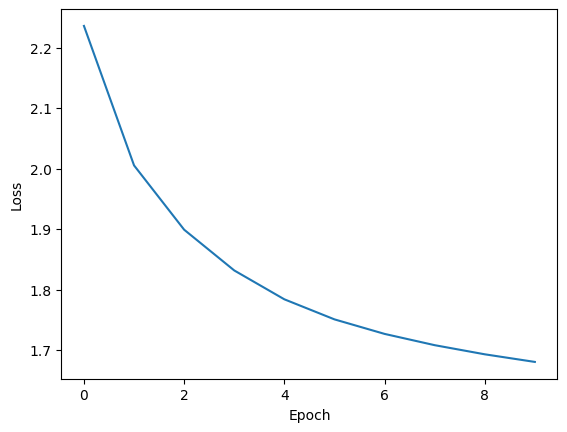

In [450]:
plt.plot(loss_in_epochs)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

For epoch 0, loss is 1.9661229773521423
For epoch 1, loss is 1.1114185318946839
For epoch 2, loss is 0.8796265615463257
For epoch 3, loss is 0.7633783778826395
For epoch 4, loss is 0.6903619890848796
For epoch 5, loss is 0.6384810035943985
For epoch 6, loss is 0.5991511084318161
For epoch 7, loss is 0.5679461536645889
For epoch 8, loss is 0.5421305224498113
For epoch 9, loss is 0.5203679220994314
Test error is is 15.079999999999998%


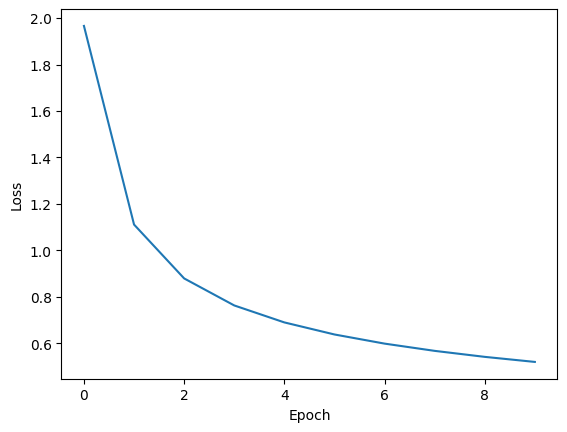

In [452]:
# Question 4 Part 4

net = Net()
initialize_weights(net, False)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

loss_in_epochs = []
for epoch in range(10):
    running_loss = 0.0
    for i, train_data in enumerate(train_loader, 0):
        train_set_inputs, train_set_labels = train_data
        # train_set_inputs = train_set_inputs.view(train_set_inputs.size(0), -1)
        network_outputs = net(train_set_inputs)
        loss = criterion(network_outputs, train_set_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_in_epochs.append(running_loss / len(train_loader))
    print(f"For epoch {epoch}, loss is {running_loss / len(train_loader)}")

num_correct_predictions = 0
total_observations = 0
with torch.no_grad():
    for data in test_loader:
        test_set_inputs, test_set_labels = data
        # test_set_inputs = test_set_inputs.view(test_set_inputs.size(0), -1)
        network_outputs = net(test_set_inputs)
        _, predicted_labels = torch.max(network_outputs.data, 1)
        total_observations += test_set_labels.size(0)
        num_correct_predictions += (predicted_labels == test_set_labels).sum().item()

print(f"Test error is is {100 - num_correct_predictions * 100 / total_observations}%")

plt.plot(loss_in_epochs)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()